In [3]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os

In [6]:
train = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/test.csv')
sample_submission = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/sample_submission.csv')
transactions = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/transactions.csv')
oil = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/oil.csv')
holidays_events = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/holidays_events.csv')
stores = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/stores.csv')

train.head(50)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [7]:
!pip install pmdarima

     |████████████████████████████████| 601 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 19.8 MB 21.5 MB/s eta 0:00:01     |███████████████████████████▏    | 16.8 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.3 MB/s  eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: statsmodels
    Found existing in

In [8]:
train = pd.read_csv('/Users/kassandramadulka/Downloads/store-sales-time-series-forecasting/train.csv', index_col='date', parse_dates=True)


,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [10]:
# no na values in training data
print(train.shape)
print(train.dropna().shape)

(3000888, 5)
(3000888, 5)


<AxesSubplot:xlabel='date'>

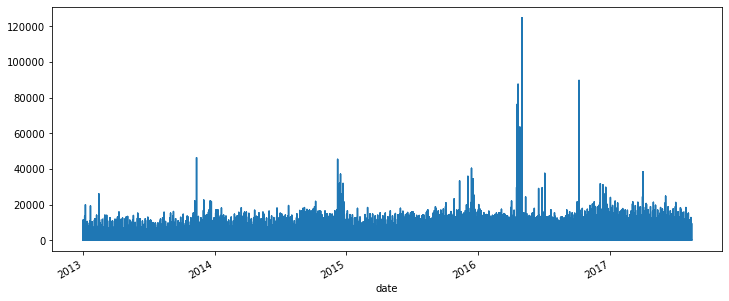

In [14]:
# train['sales'].plot(figsize=(12,5))
# family_list = train['family'].unique()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print('ADF: ',dftest[0])
    print('p-value: ', dftest[1])
    print('num lags: ', dftest[2])
    print('num obs used for adf reg and critical values calc: ', dftest[3])
    print('critical values: ')
    for key, val in dftest[4].items():
        print("\t", key, ': ',val)

# ad_test(train['sales'])

<AxesSubplot:xlabel='date'>

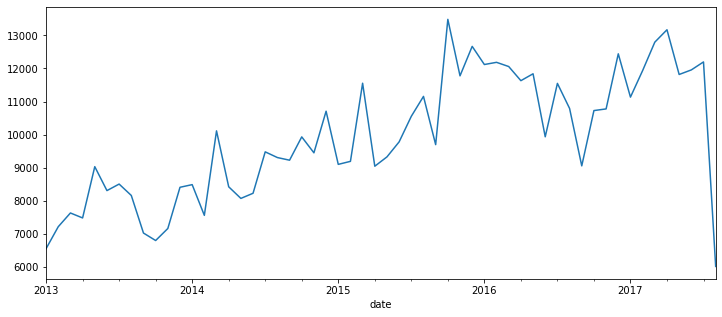

In [24]:
# resample data
automotive = train[train['family']=='AUTOMOTIVE'][['sales']].resample('M').sum()
automotive['sales'].plot(figsize=(12,5))

In [25]:
# p-value is too big so non stationary - we will need to take the difference
ad_test(automotive['sales'])

ADF:  -1.5199229097758855
p-value:  0.5236337513432894
num lags:  6
num obs used for adf reg and critical values calc:  49
critical values: 
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


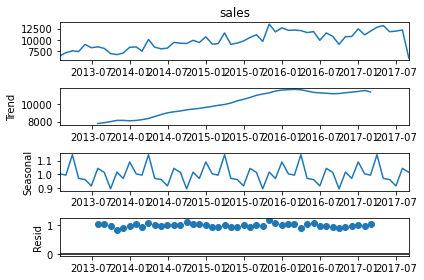

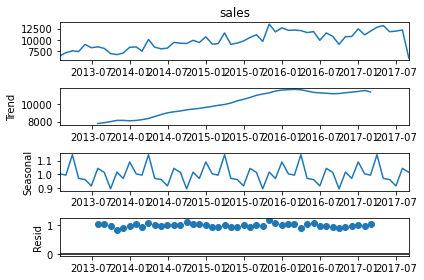

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(automotive['sales'], model = 'multiplicative').plot()

In [93]:
# stationary at first difference with p-value < .05
ad_test(automotive['sales'].diff().dropna())

ADF:  -2.9179176519402654
p-value:  0.04330374059218502
num lags:  5
num obs used for adf reg and critical values calc:  49
critical values: 
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


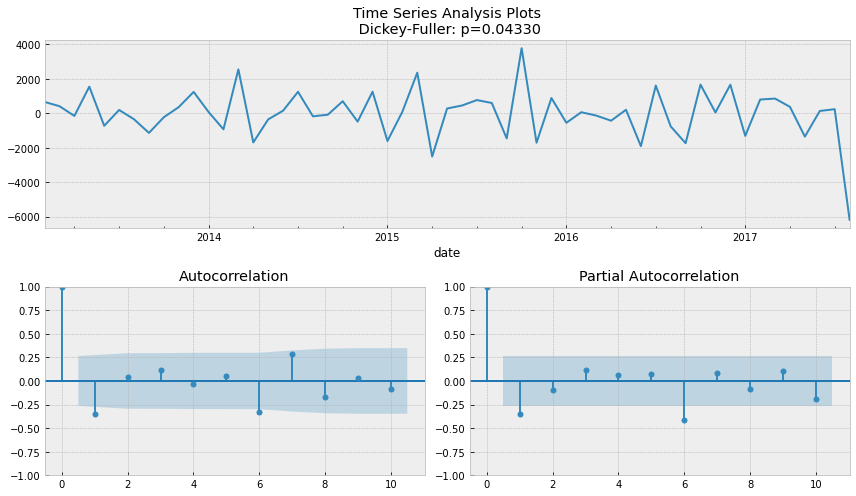

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
%matplotlib inline

# f = plt.figure()
# # ax1 = f.add_subplot(111)
# # plot_acf(automotive['sales'].diff().dropna(), ax=ax1)

# ax2 = f.add_subplot(111)
# plot_pacf(automotive['sales'].diff().dropna(), ax=ax2)

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        

tsplot(automotive['sales'].diff().dropna(),lags=10)

In [162]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
# automotive_diff = automotive['sales'].diff().dropna()
stepwise_fit = auto_arima(automotive['sales'], seasonal=True, trace=True, surpress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=955.675, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=961.002, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=955.554, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=955.347, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=959.008, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=956.827, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=955.535, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=955.800, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=953.599, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=955.025, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=953.737, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=953.632, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=953.791, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.707 seconds


In [163]:
from statsmodels.tsa.arima.model import ARIMA
# split into train test set
automotive_diff = automotive['sales'].diff().dropna()
indx = round((automotive_diff.shape[0])*.8)
automotive_train = automotive_diff[:indx]

# create model
model = ARIMA(automotive['sales'][:indx], order = (0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   44
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -361.709
Date:                Sat, 24 Dec 2022   AIC                            727.417
Time:                        19:27:53   BIC                            730.940
Sample:                    01-31-2013   HQIC                           728.716
                         - 08-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4396      0.142     -3.098      0.002      -0.718      -0.161
sigma2      1.044e+06   1.73e+05      6.039      0.000    7.05e+05    1.38e+06
Ljung-Box (L1) (Q):                   2.06   Jarque-

In [172]:
start = indx
end = automotive['sales'].shape[0] -1

pred = model_fit.predict(start=start,end=end, type='levels')
# pred.index=automotive.index[start:end]
print(pred)

2016-09-30    10974.947418
2016-10-31    10974.947418
2016-11-30    10974.947418
2016-12-31    10974.947418
2017-01-31    10974.947418
2017-02-28    10974.947418
2017-03-31    10974.947418
2017-04-30    10974.947418
2017-05-31    10974.947418
2017-06-30    10974.947418
2017-07-31    10974.947418
2017-08-31    10974.947418
Freq: M, Name: predicted_mean, dtype: float64


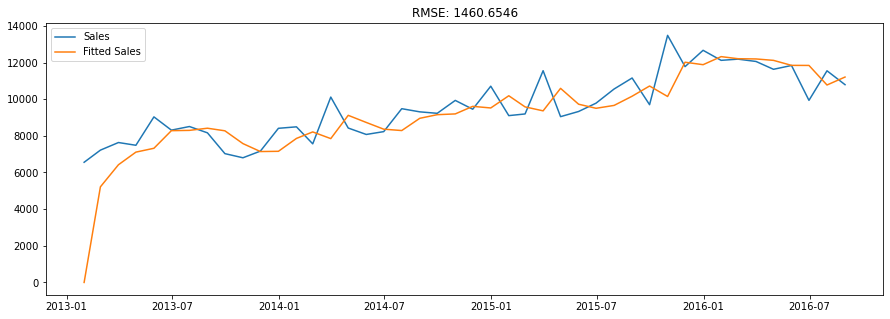

In [165]:
# pred.plot(legend=True)
# automotive[indx:]['sales'].plot(legend=True)

# Fitted values of the model
predictions_ARIMA = pd.Series(model_fit.fittedvalues, copy=True)

# Reversing the 1st order Differencing by taking cumulative sum 
predictions_ARIMA_cumsum = predictions_ARIMA# .cumsum()

#automotive['sales']

fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(automotive['sales'][:indx],label = 'Sales')
plt.plot(predictions_ARIMA_cumsum,label = 'Fitted Sales');
plt.legend(loc="upper left")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_cumsum - automotive['sales'][:indx])**2)/len(automotive['sales'][:indx])));

In [168]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(automotive['sales'][:indx], predictions_ARIMA))
print('Train RMSE: %.4f' % error)
# predictions_series = pd.Series(pred.cumsum()[1:] + automotive_train[-1], index = test.index)

Train RMSE: 1460.6546


In [177]:
error = np.sqrt(mean_squared_error(automotive['sales'][indx:], pred))
print('Test RMSE: %.4f' % error)

Test RMSE: 1886.7202
